In [30]:
# %matplotlib inline
'''Module Import'''
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy as sp
# Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output
import arc
from arc import *
from sympy import*
import sympy as sym
import scipy.linalg as ling
import numpy.linalg as nling
from sympy.physics.quantum import TensorProduct as tens
from sympy import Matrix
import itertools
from itertools import combinations
from qutip import *
import pandas as pd
from IPython.display import display, Math, Latex

import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
import itertools as iter
import csv

'''Constants'''
#Time units in ps (10E-12)
qe=1.609E-19 #Charge
eps0=8.8541878128E-12 #Free Space Permittivity
mu0=4.0*pi*1E-7 #Free Space Permeability
hbar=1.0545718E-34 #Reduced Planck's constant
c=2.99792458E-4 #Speed of Light
e=1.60217662E-19 #Charge
a_0=5.291772109E-11 #Debye
ea_0 = 8.51161e-30

'''Transition Rates'''





use_rwa = True #Use Rotoating Wave Approximation (N/A)


#Gauge argument in exponential matrix term
def F(tx, args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl0 = args['t_l']
    tc0 = args['t_c']
    tm0 = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    wl = args['w_0']+d
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    t=tx-0.0*np.floor((tx)/(2.0*tm0))*2.0*tm0
    sums = 0
    sumf = 0
    for i in [-1,0,1]:
        #for k in [3.0]:
        for k in np.arange(-nt,nt+1,1):
            tc = args['t_c']+i*2.0*args['t_m']
            tm = args['t_m']+i*2.0*args['t_m']
            tl = args['t_l']+i*2.0*args['t_m']
            
        
        
        
            sums+=-0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-tx+1j*tau**2*((wl+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-tx+1j*tau**2*((wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(tx*(wl+k*(wmod))-tc*(wl)-tm*(k*wmod))-(tc-tx)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-tx+1j*tau**2*((-wl+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-tx+1j*tau**2*((-wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(tx*(-wl+k*(wmod))-tc*(-wl)-tm*(k*wmod))-(tc-tx)**2/(2.0*tau**2)))

            sums+=(1.0-1.0*tx/(2.0*tm0))*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-0+1j*tau**2*((wl+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-0+1j*tau**2*((wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(0*(wl+k*(wmod))-tc*(wl)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-0+1j*tau**2*((-wl+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-0+1j*tau**2*((-wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(0*(-wl+k*(wmod))-tc*(-wl)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2)))


            sumf+=1.0*tx/(2.0*tm0)*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-2.0*tm0+1j*tau**2*((wl+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-2.0*tm0+1j*tau**2*((wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(2.0*tm0*(wl+k*(wmod))-tc*(wl)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-2.0*tm0+1j*tau**2*((-wl+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-2.0*tm0+1j*tau**2*((-wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(2.0*tm0*(-wl+k*(wmod))-tc*(-wl)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2)))
        
    return sums+1.0*sumf


def L(args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl0 = args['t_l']
    tc0 = args['t_c']
    tm0 = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    wl = w0+d
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)

    sums = 0
    sumf = 0
    for i in [-1,0,1]:
        #for k in [3.0]:
        for k in np.arange(-nt,nt+1,1):
            tc = args['t_c']+i*2.0*args['t_m']
            tm = args['t_m']+i*2.0*args['t_m']
            tl = args['t_l']+i*2.0*args['t_m']
  
            sums+=(-1.0/(2.0*tm0))*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-0+1j*tau**2*((wl+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-0+1j*tau**2*((wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(0*(wl+k*(wmod))-tc*(wl)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-0+1j*tau**2*((-wl+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-0+1j*tau**2*((-wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(0*(-wl+k*(wmod))-tc*(-wl)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2)))


            sumf+=1.0/(2.0*tm0)*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-2.0*tm0+1j*tau**2*((wl+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-2.0*tm0+1j*tau**2*((wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(2.0*tm0*(wl+k*(wmod))-tc*(wl)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-2.0*tm0+1j*tau**2*((-wl+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-2.0*tm0+1j*tau**2*((-wl+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(2.0*tm0*(-wl+k*(wmod))-tc*(-wl)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2)))
        
    return sums+1.0*sumf


            

#Lindbladian superoperator in interaction operator (removing w0/2 bare state energies)


#System, Field, Charge parameters. Dictionary used to store values for convenience
argz = {'Rabi': 1.0E-1*2.0*np.pi, 'tau': 0.7*1.0/8.0*1.0E0,'t_c': 1.0/4.0*1.0E0, 't_l': 1.0/4.0*1.0E0, 't_m': 1.0/4.0*1.0E0,
        'PMphase': 0.0, 'OSphase':0.0,'Grdephase':0.0,'ModAmp': 0.5, 'Delta1': -3.0*2.0E-2*np.pi, 'gamma': 1.0E-6*2.0*np.pi,
        'depha12': 0.0E-6, 'w_0': 2.0E-2*np.pi, 'wmod': 2.0E0*np.pi/(0.5),'T': 0.5, 'Nterms':4}

def Fxd0(txx,args):
    tx=txx-np.round(txx/argz['T'])*argz['T']
    term=0.0j+0.0+0.0*L(argz)
    for i in [-1,0,1]:
            tc = argz['t_c']+i*2.0*argz['t_m']
            tm = argz['t_m']+i*2.0*argz['t_m']
            tl = argz['t_l']+i*2.0*argz['t_m']
        
            term+=argz['Rabi']*np.exp(-(tx-tc)**2/(2.0*argz['tau']**2))*\
            np.cos((argz['w_0']+argz['Delta1'])*(tx-tl)+argz['ModAmp']*np.cos((argz['wmod'])*(tx-tm)))
            
            
    return term



                                                                                                         
    
times=np.linspace(0.0,2.0*argz['t_m'],1000)
timesev=np.linspace(0.0,2.0*argz['t_m'],1000)

#Gauge function interpolant
Fdata=F(timesev, argz)    
Fxds = Fxd0(timesev,argz)
Fxs = interpolate.splrep(timesev, Fdata,s=0)
Fxds = interpolate.splrep(timesev, Fxds,s=0)
xnew = np.linspace(0.0,2.0*argz['t_m'],5000)
#ynew = interpolate.splev(xnew, tckr, der=0)


def Rot(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxs)
    Ax=np.cos(Fx)
    Bx=np.sin(Fx)

    Rotx=np.array([[Ax,1.0j*Bx],[1.0j*Bx,Ax]])
    return Rotx

def Rotd(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    Fxd=interpolate.splev(t,Fxdrs)+1.0j*interpolate.splev(t,Fxdis)
    Fxad=interpolate.splev(t,Fxadd)
    #display(Fxad)
    j0=special.sinc(0.5*np.abs(Fx)/np.pi)
    j0d=0.5*special.spherical_jn(0,0.5*np.abs(Fx),derivative=True)*Fxad
    j1=special.sinc(np.abs(Fx)/np.pi)
    j1d=special.spherical_jn(0,np.abs(Fx),derivative=True)*Fxad
    #display(j1d)
    B1c=-np.imag((Fx))*np.imag(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B2c=-np.real((Fx))*np.real(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.real((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B3c=-np.sin(np.abs(Fx))*Fxad
    A1c=-1/2*np.imag((Fxd))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-\
        1/2*np.imag((Fx))*np.real((Fxd))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    E1c=np.imag((Fxd))*special.sinc(np.abs(Fx)/np.pi)+np.imag((Fx))*j1d
    #display(E1c)
    C1c=np.real(Fxd)*special.sinc(np.abs(Fx)/np.pi)+np.real((Fx))*j1d
    Rotx=np.array([[B1c,A1c,-E1c,0],[A1c,B2c,-C1c,0],[E1c,C1c,B3c,0],[0,0,0,0.0]])
    
    return Rotx

#Interpolation for Gauge transformation operator 

Rotin=np.vectorize(lambda x: Rot(x,argz))
Rotdata=np.array([Rotin(t) for t in timesev])
Rotint=interpolate.CubicSpline(timesev, Rotdata)
Rotintd=Rotint.derivative()

A1=integrate.quad(lambda x: 1/(argz['T'])*np.cos(2.0*F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
B1=integrate.quad(lambda x: 1/(argz['T'])*np.sin(2.0*F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]

K0=np.array([[-argz['w_0']/2.0*A1,1.0j*argz['w_0']/2.0*B1-1.0j*L(argz)],
   [-1.0j*argz['w_0']/2.0*B1+1.0j*L(argz),argz['w_0']/2.0*A1]])

def G(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxs)
    #Commutative
    
    A1r=integrate.quad(lambda x: np.real(1.0/(2.0*np.pi)*np.cos(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A1i=integrate.quad(lambda x: np.imag(1.0/(2.0*np.pi)*np.cos(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1r=integrate.quad(lambda x: np.real(1.0j*1.0/(2.0*np.pi)*np.sin(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: np.imag(1.0j*1.0/(2.0*np.pi)*np.sin(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
 
    Lr=np.array([[-A1r,B1r]
                 ,[-B1r,A1r]])
    
    Li=np.array([[-A1i,B1i]
                 ,[-B1i,A1i]])
    

    
    return -(Lr+1.0j*Li)

def DG(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxs)
    #Commutative
    
    A1r=integrate.quad(lambda x: np.real(1.0/(2.0*np.pi)*np.cos(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A1i=integrate.quad(lambda x: np.imag(1.0/(2.0*np.pi)*np.cos(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1r=integrate.quad(lambda x: np.real(1.0j*1.0/(2.0*np.pi)*np.sin(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: np.imag(1.0j*1.0/(2.0*np.pi)*np.sin(2.0*Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
 
    Lr=np.array([[-A1r,B1r]
                 ,[-B1r,A1r]])
    
    Li=np.array([[-A1i,B1i]
                 ,[-B1i,A1i]])
        
    Lxx=-1.0j*(Lr+1.0j*Li)
        
    qz=np.sqrt(nling.det(Lxx))
    
    L1=np.cos(qz)*np.array([[1+0j,0+0j],[0+0j,1+0j]])
    L2=-np.sin(qz)/qz*Lxx
    #display(qz)
    
    return L1+L2
    
     

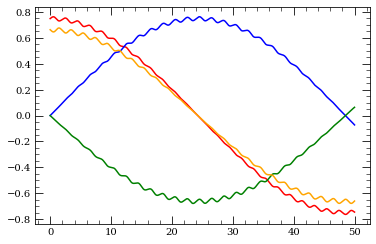

In [3]:
times=np.linspace(0.0,50.0,10000)
psilist=[]
for k in times:
    term=np.matmul(Rot(k*argz['t_m'],argz),np.matmul(ling.expm(-1.0j*K0*k*argz['t_m']),np.array([7.48737487e-01+0.j,-2.32314168e-14+0.66286663j])))
    psilist.append(term)


fig, ax = plt.subplots(1,1)
# Create multiple plots 
ax.plot(times , np.real(psilist)[:,0], 'r',label=r'$\Re\psi_1)$')
ax.plot(times , np.imag(psilist)[:,0], 'b',label=r'$\Im\psi_1$')
ax.plot(times , np.real(psilist)[:,1], 'g',label=r'$\Re\psi_2)$')
ax.plot(times , np.imag(psilist)[:,1], color='orange',label=r'$\Im\psi_2$')

# Set title and labels


In [10]:
e1,e2=np.angle(ling.eig(ling.expm(1.0j*K0*2.0*argz['t_m']))[0])/(2.0*argz['t_m'])
display(e1)
v1,v2=ling.eig(ling.expm(1.0j*K0*argz['T']))[1]
display(v1)
display(ling.expm(-1.0j*K0*25.0))

-0.2590508739599796

array([7.48737487e-01+0.j        , 3.88578059e-16+0.66286663j])

array([[ 0.98141664+2.32599483e-02j,  0.19047404-2.97071395e-17j],
       [-0.19047404+2.88397778e-17j,  0.98141664-2.32599483e-02j]])

In [23]:
def floquetmodes(tx,k,wc):
    t1=tx-1.0*np.floor((tx)/argz['T'])*argz['T']
    term1=np.matmul(Rotint(t1),np.matmul(ling.expm(-1.0j*K0*tx),v1))*np.exp(-1.0j*k*wc*tx)
    term2=np.matmul(Rotint(t1),np.matmul(ling.expm(-1.0j*K0*tx),v2))*np.exp(-1.0j*k*wc*tx)
    return term1,term2
fx1lst=[]
fx2lst=[]
wc1=argz['wmod']
Tf=argz['T']
for i in [-2,-1,0,1,2]:
    term1=integrate.romberg(lambda x: np.real(floquetmodes(x,i,wc1)[0][0]),0.0,Tf)+1.0j*integrate.romberg(lambda x: np.imag(floquetmodes(x,i,wc1)[0][0]),0.0,Tf)
    term2=integrate.romberg(lambda x: np.real(floquetmodes(x,i,wc1)[1][0]),0.0,Tf)+1.0j*integrate.romberg(lambda x: np.imag(floquetmodes(x,i,wc1)[1][0]),0.0,Tf)
    term11=integrate.romberg(lambda x: np.real(floquetmodes(x,i,wc1)[0][1]),0.0,Tf)+1.0j*integrate.romberg(lambda x: np.imag(floquetmodes(x,i,wc1)[0][1]),0.0,Tf)
    term21=integrate.romberg(lambda x: np.real(floquetmodes(x,i,wc1)[1][1]),0.0,Tf)+1.0j*integrate.romberg(lambda x: np.imag(floquetmodes(x,i,wc1)[1][1]),0.0,Tf)
    fx1lst=np.append(fx1lst, [[term1,term11]])
    fx2lst=np.append(fx2lst, [[term2,term21]])
display(fx1lst)
display(fx2lst)




array([ 0.00384609+1.06390443e-04j, -0.00038048+3.37442678e-03j,
        0.00730654+4.05245720e-03j,  0.00359177+6.94223244e-03j,
        0.37328596+2.40643351e-02j, -0.02159469+3.30459763e-01j,
       -0.00762285-4.13593309e-03j, -0.00364519-7.21504789e-03j,
       -0.00387513-5.62436288e-06j,  0.00049879-3.41096392e-03j])

array([-0.00049879-3.41096392e-03j, -0.00387513+5.62436288e-06j,
        0.00364519-7.21504789e-03j, -0.00762285+4.13593309e-03j,
        0.02159469+3.30459763e-01j,  0.37328596-2.40643351e-02j,
       -0.00359177+6.94223244e-03j,  0.00730654-4.05245720e-03j,
        0.00038048+3.37442678e-03j,  0.00384609-1.06390443e-04j])

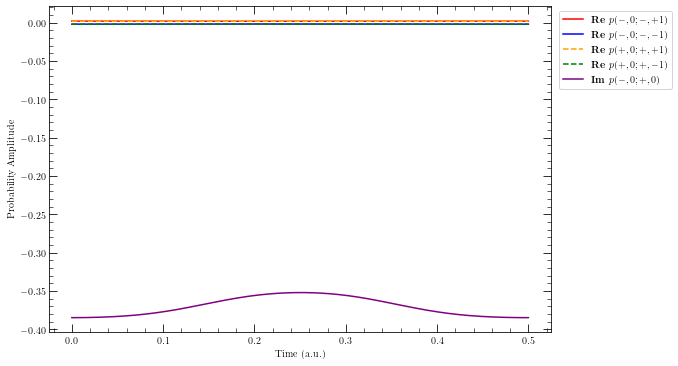

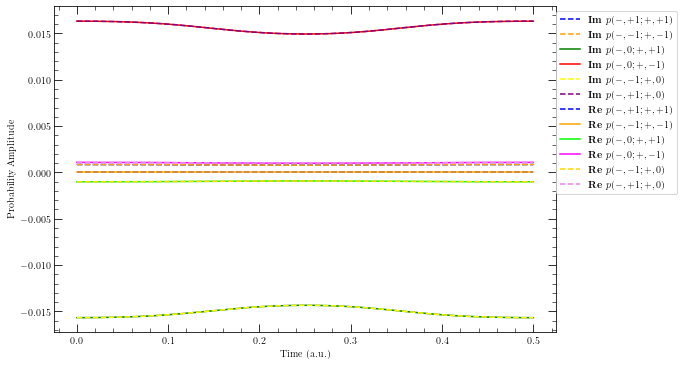

In [33]:

f1m2=Qobj(np.array([fx1lst[0],fx1lst[1]],dtype=complex))
f1m1=Qobj(np.array([fx1lst[2],fx1lst[3]],dtype=complex))
f10=0.5*Qobj(np.array([fx1lst[4],fx1lst[5]],dtype=complex))
f1p1=Qobj(np.array([fx1lst[6],fx1lst[7]],dtype=complex))
f1p2=Qobj(np.array([fx1lst[8],fx1lst[9]],dtype=complex))

f2m2=Qobj(np.array([fx2lst[0],fx2lst[1]],dtype=complex))
f2m1=Qobj(np.array([fx2lst[2],fx2lst[3]],dtype=complex))
f20=0.5*Qobj(np.array([fx2lst[4],fx2lst[5]],dtype=complex))
f2p1=Qobj(np.array([fx2lst[6],fx2lst[7]],dtype=complex))
f2p2=Qobj(np.array([fx2lst[8],fx2lst[9]],dtype=complex))


H=[-argz['wmod']/2*sigmaz(),[sigmaz(),Fxd0]]

Heval=QobjEvo(H, args=argz)

tldata=np.linspace(0.0,Tf,1000)

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(1,1)
# Create multiple plots 
ax.plot(tldata , np.real([(f10.dag()*Heval(x)*f1p1)[0,0] for x in tldata]), 'r',label=r'$\textbf{Re } p(-,0; -,+1)$')
ax.plot(tldata , np.real([(f10.dag()*Heval(x)*f1m1)[0,0] for x in tldata]), 'b',label=r'$\textbf{Re } p(-,0; -,-1)$')
ax.plot(tldata , np.real([(f20.dag()*Heval(x)*f2p1)[0,0] for x in tldata]),'--', color='orange',label=r'$\textbf{Re } p(+,0; +,+1)$')
ax.plot(tldata , np.real([(f20.dag()*Heval(x)*f2m1)[0,0] for x in tldata]), '--',color='green',label=r'$\textbf{Re } p(+,0; +,-1)$')
ax.plot(tldata , np.imag([(f10.dag()*Heval(x)*f20)[0,0] for x in tldata]), color='purple',label=r'$\textbf{Im } p(-,0; +,0)$')
# Set title and labels

ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('Probability Amplitude')
# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
# Visualize the final plot
fig.set_size_inches(10, 6,forward='True')
fig.savefig('Transitionprobs.jpg', dpi=200)
plt.show()




fig, ax = plt.subplots(1,1)
ax.plot(tldata , np.imag([(f1p1.dag()*Heval(x)*f2p1)[0,0] for x in tldata]),'--' 'b',label=r'$\textbf{Im } p(-,+1; +,+1)$')
ax.plot(tldata , np.imag([(f1m1.dag()*Heval(x)*f2m1)[0,0] for x in tldata]),'--', color='orange',label=r'$\textbf{Im } p(-,-1; +,-1)$')
ax.plot(tldata , np.imag([(f10.dag()*Heval(x)*f2p1)[0,0] for x in tldata]), '-',color='green',label=r'$\textbf{Im } p(-,0; +,+1)$')
ax.plot(tldata , np.imag([(f10.dag()*Heval(x)*f2m1)[0,0] for x in tldata]), '-',color='red',label=r'$\textbf{Im } p(-,0; +,-1)$')
ax.plot(tldata , np.imag([(f1m1.dag()*Heval(x)*f20)[0,0] for x in tldata]), '--',color='yellow',label=r'$\textbf{Im } p(-,-1; +,0)$')
ax.plot(tldata , np.imag([(f1p1.dag()*Heval(x)*f20)[0,0] for x in tldata]), '--',color='purple',label=r'$\textbf{Im } p(-,+1; +,0)$')
ax.plot(tldata , np.real([(f1p1.dag()*Heval(x)*f2p1)[0,0] for x in tldata]),'--' 'b',label=r'$\textbf{Re } p(-,+1; +,+1)$')
ax.plot(tldata , np.real([(f1m1.dag()*Heval(x)*f2m1)[0,0] for x in tldata]),'-', color='orange',label=r'$\textbf{Re } p(-,-1; +,-1)$')
ax.plot(tldata , np.real([(f10.dag()*Heval(x)*f2p1)[0,0] for x in tldata]), '-',color='lime',label=r'$\textbf{Re } p(-,0; +,+1)$')
ax.plot(tldata , np.real([(f10.dag()*Heval(x)*f2m1)[0,0] for x in tldata]), '-',color='magenta',label=r'$\textbf{Re } p(-,0; +,-1)$')
ax.plot(tldata , np.real([(f1m1.dag()*Heval(x)*f20)[0,0] for x in tldata]), '--',color='gold',label=r'$\textbf{Re } p(-,-1; +,0)$')
ax.plot(tldata , np.real([(f1p1.dag()*Heval(x)*f20)[0,0] for x in tldata]), '--',color='violet',label=r'$\textbf{Re } p(-,+1; +,0)$')

ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('Probability Amplitude')
# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
# Visualize the final plot
fig.set_size_inches(10, 6,forward='True')
fig.savefig('Transitionprobs.jpg', dpi=200)
plt.show()

In [ ]:
plt.rcParams['text.usetex'] = True
plt.plot(tldata , np.imag([(f10.dag()*Heval(x)*f2p1)[0,0] for x in tldata]), '--',color='green',label=r'$\textbf{Im } p(-0\rightarrow +,1)$')



plt.xlabel('Time')
plt.ylabel('Re p')
plt.legend()
plt.show()

In [19]:
display(integrate.romberg(lambda x: np.real(floquetmodes(x,0,wc1)[0][0]),0.0,Tf))

0.37328596076790643